Filter-Bank

In [1]:
from modules.filterbank import FilterBank
from modules.detectFQRS import DetectFQRS
import numpy as np

#get data
raw_direct_fecg_data, raw_abdecg_data_c1, _, _, _ = np.loadtxt('r04.csv', delimiter=',', unpack=True).tolist()
data = np.asarray(raw_abdecg_data_c1)
crop_data = data[7000:12000]

#config params, attr
frequency_sampling = 1000
FQRS_detector = DetectFQRS(frequency_sampling=frequency_sampling, data=crop_data)

preprocessed_data = FQRS_detector.preprocess(data=crop_data, cutoff_low=15, cutoff_high=2, filter_order=2)


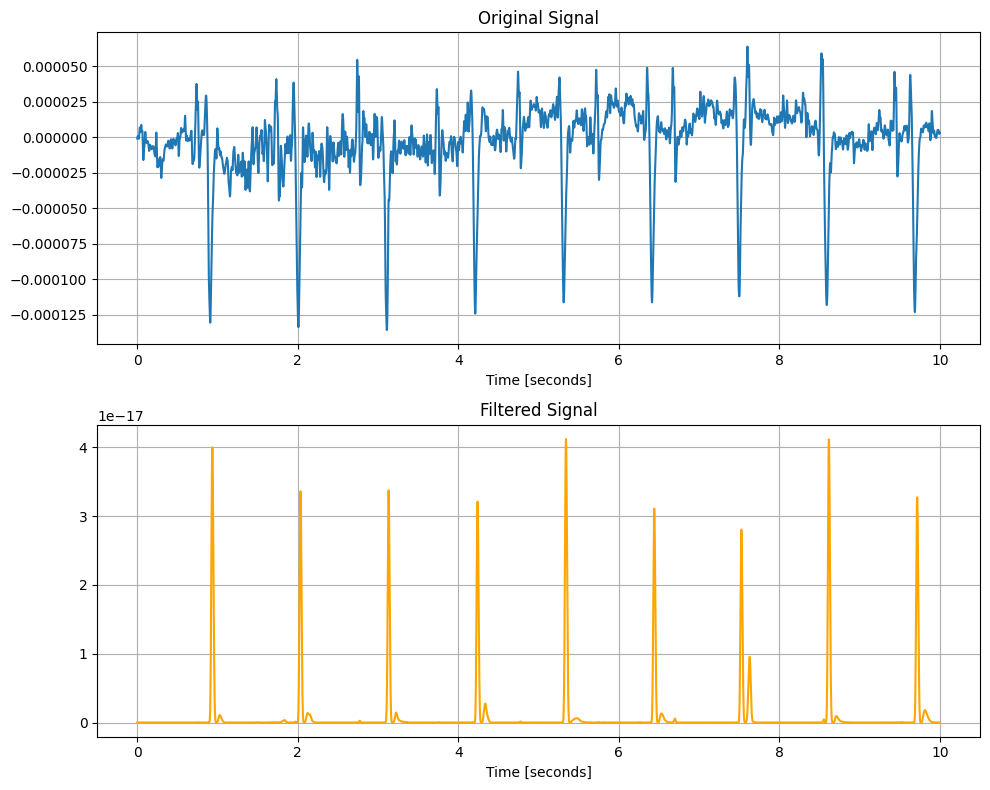

In [2]:
import matplotlib.pyplot as plt

time_len = 5000
t = np.linspace(0, 10, int(time_len), endpoint=False)
len(t)


plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, crop_data, label='Original signal')
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, preprocessed_data**2, label='Filtered signal (high-pass)', color='orange')
plt.title('Filtered Signal')
plt.xlabel('Time [seconds]')
plt.grid()
plt.tight_layout()
plt.show()


[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07
 0.072 0.074 0.076 0.078 0.08  0.082 0.084 0.086 0.088 0.09  0.092 0.094
 0.096 0.098 0.1   0.102 0.104 0.106 0.108 0.11  0.112 0.114 0.116 0.118
 0.12  0.122 0.124 0.126 0.128 0.13  0.132 0.134 0.136 0.138 0.14  0.142
 0.144 0.146 0.148 0.15  0.152 0.154 0.156 0.158 0.16  0.162 0.164 0.166
 0.168 0.17  0.172 0.174 0.176 0.178 0.18  0.182 0.184 0.186 0.188 0.19
 0.192 0.194 0.196 0.198 0.2   0.202 0.204 0.206 0.208 0.21  0.212 0.214
 0.216 0.218 0.22  0.222 0.224 0.226 0.228 0.23  0.232 0.234 0.236 0.238
 0.24  0.242 0.244 0.246 0.248 0.25  0.252 0.254 0.256 0.258 0.26  0.262
 0.264 0.266 0.268 0.27  0.272 0.274 0.276 0.278 0.28  0.282 0.284 0.286
 0.288 0.29  0.292 0.294 0.296 0.298 0.3   0.302 0.304 0.306 0.308 0.31
 0.312 0.314 0.316 0.318 0.32  0.322 0.324 0.326 0.328

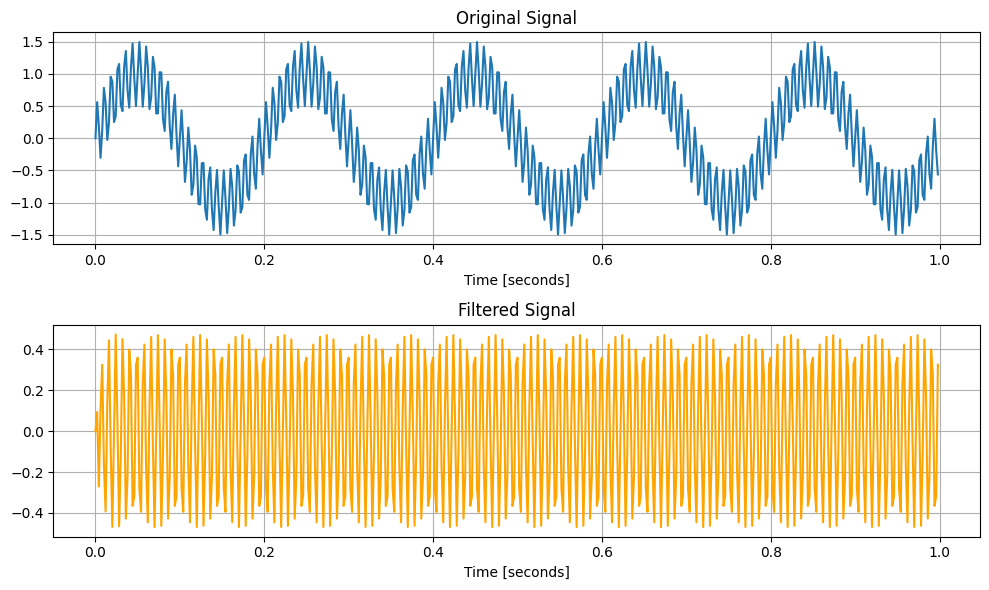

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfilt

# Sample rate and desired cutoff frequency (in Hz)
fs = 500.0  # Sample rate, Hz
cutoff = 100.0  # Desired cutoff frequency of the filter, Hz

# Design the Butterworth high-pass filter
order = 4  # Filter order
sos = butter(order, cutoff, btype='highpass', fs=fs, output='sos')

# Generate a sample signal: a combination of a low frequency and a high frequency sine wave
t = np.linspace(0, 1.0, int(fs), endpoint=False)
print(t)
low_freq = 5.0  # Low frequency component
high_freq = 120.0  # High frequency component
x = np.sin(2 * np.pi * low_freq * t) + 0.5 * np.sin(2 * np.pi * high_freq * t)

# Apply the high-pass filter
y = sosfilt(sos, x)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Original signal')
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, y, label='Filtered signal (high-pass)', color='orange')
plt.title('Filtered Signal')
plt.xlabel('Time [seconds]')
plt.grid()

plt.tight_layout()
plt.show()


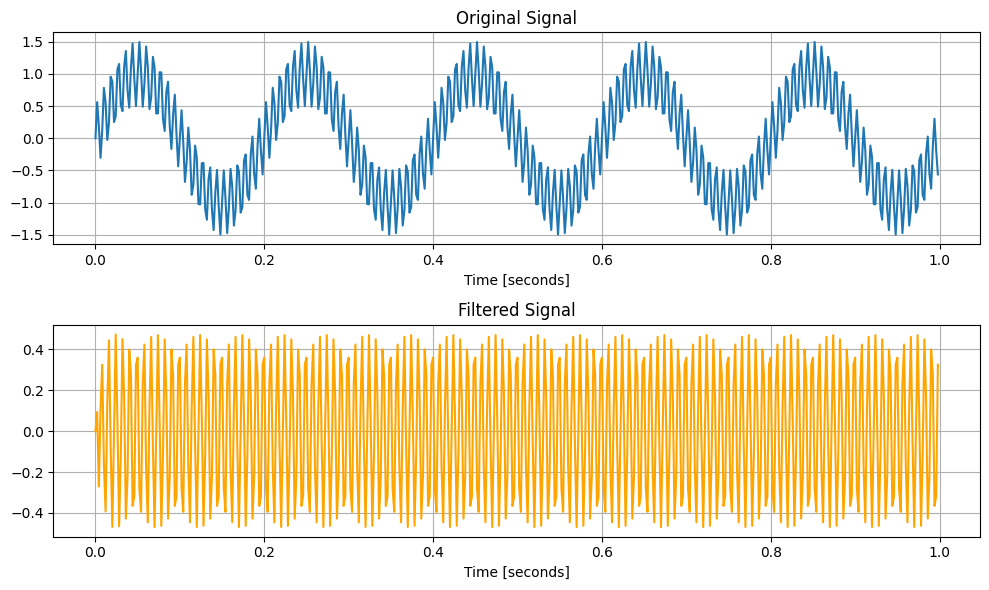